# Simple Linear Regression

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Salary_Data.csv")

## Splitting the dataset into the Training set and Test set

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(train_X)

[[10.3]
 [ 8.7]
 [ 4. ]
 [ 1.1]
 [ 2.2]
 [ 5.1]
 [ 2.9]
 [ 4.1]
 [ 4. ]
 [ 7.9]
 [ 1.3]
 [ 1.5]
 [ 9. ]
 [ 2. ]
 [ 7.1]
 [ 9.5]
 [ 5.9]
 [10.5]
 [ 6.8]
 [ 3.2]
 [ 3.9]
 [ 4.5]
 [ 6. ]
 [ 3. ]]


In [ ]:
print(test_X)

[[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]
 [3.7]]


In [ ]:
print(train_y)

[122391. 109431.  56957.  39343.  39891.  66029.  56642.  57081.  55794.
 101302.  46205.  37731. 105582.  43525.  98273. 116969.  81363. 121872.
  91738.  54445.  63218.  61111.  93940.  60150.]


In [ ]:
print(test_y)

[112635.  67938. 113812.  83088.  64445.  57189.]


## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(test_X)

In [ ]:
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [ ]:
print(test_y)

[112635.  67938. 113812.  83088.  64445.  57189.]


## Visualising the Training set results

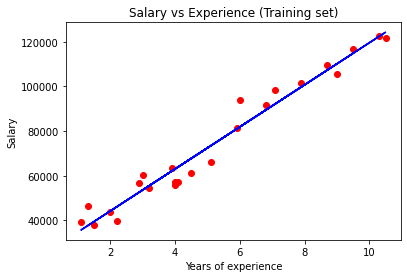

In [ ]:
plt.scatter(train_X,train_y, color = 'red')
plt.plot(train_X,regressor.predict(train_X), color = 'blue')
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

## Visualising the Test set results

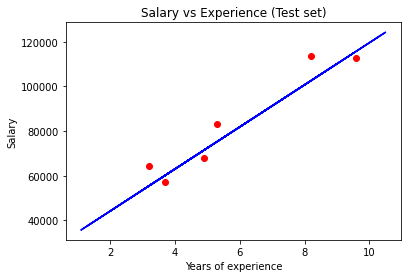

In [ ]:
plt.scatter(test_X,test_y, color = 'red')
plt.plot(train_X,regressor.predict(train_X), color = 'blue')
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

# Predicting the salary at a given Experience

In [ ]:
print("The salary of 12 years of experience is: ")
print(regressor.predict([[12]]))

The salary of 12 years of experience is: 
[138407.36688815]


# The coefecient and the -intercept

In [ ]:
print("The equation of the linear regression is: ")
print("Salary =",regressor.coef_,"* Experience +",regressor.intercept_)

The equation of the linear regression is: 
Salary = [9423.81532303] * Experience + 25321.583011776813


# Extra: accurate Regression but not A line

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 8) # Here we are making an instance of the PolynomialFeatures class that helps as to make a matrix  with that form of X^0+X^1+X^2 for all the X data 
X_poly = poly_reg.fit_transform(train_X) # Here we are fitting the polynomial feature and transofrmin the result on the X dataset
lin_reg_2 = LinearRegression() # Here we make an instance of the LinearRegression class that helps us to claculate the linear coeficients of the equation b0*X^0+b1*X^1+b2*X^2 
lin_reg_2.fit(X_poly, train_y) # Here we are fitting the datasets that we have from the polynomilafeature class and the y dataset in other words making the linear regression for the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

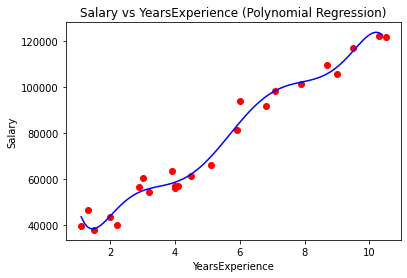

In [ ]:
X_grid = np.arange(min(train_X), max(train_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(train_X, train_y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Salary vs YearsExperience (Polynomial Regression)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Extra: Predicting the salary of 12 years of experience

In [ ]:
print("The salary of 12 years of experience is:")
print(-1*lin_reg_2.predict(poly_reg.transform([[12]])))

The salary of 12 years of experience is:
[192501.71585868]


# The coeffecient of the polynomial and the constant

In [ ]:
print("The polynomial is: ")
print(lin_reg_2.intercept_," + ",lin_reg_2.coef_[1],"*X "+" + ",lin_reg_2.coef_[3],"*X^2 "," + ",lin_reg_2.coef_[4],"*X^4 "," + ",lin_reg_2.coef_[5],"*X^5 "," + ",lin_reg_2.coef_[6],"*X^6 "," + ",lin_reg_2.coef_[7],"*X^7 "," + ",lin_reg_2.coef_[8],"*X^8 ")

The polynomial is: 
258451.36747838743  +  -468273.74388485035 *X  +  -155356.35867061972 *X^2   +  35272.470955786266 *X^4   +  -4595.905858856124 *X^5   +  335.4224170081152 *X^6   +  -12.372370729222894 *X^7   +  0.16881985729560256 *X^8 
